In [4]:
from datautil import *


for pmt in PMTs:
    r = get_mig_stats_by_src("c", pmt)
    print(
        f"{r['src'].title()}:\t {r['mig_proj']} migration projects, {r['mig_commit']} migration commits, {r['mig']} migrations, {r['mig_rule']} migration rules"
    )

c_mig_stats = get_mig_stats("c")
print(
    f"Total:\t {c_mig_stats['mig_proj']} migration projects, {c_mig_stats['mig_commit']} migration commits, {c_mig_stats['mig']} migrations, {c_mig_stats['mig_rule']} migration rules"
)

Conan:	 132 migration projects, 223 migration commits, 260 migrations, 98 migration rules
Vcpkg:	 65 migration projects, 92 migration commits, 96 migrations, 53 migration rules
Meson:	 156 migration projects, 253 migration commits, 271 migrations, 104 migration rules
Xmake:	 4 migration projects, 5 migration commits, 6 migrations, 5 migration rules
Pc-Config:	 0 migration projects, 0 migration commits, 0 migrations, 0 migration rules
Gitsubmodule:	 104 migration projects, 110 migration commits, 120 migrations, 83 migration rules
Deb:	 867 migration projects, 1048 migration commits, 1418 migrations, 361 migration rules
Total:	 1323 migration projects, 1731 migration commits, 2171 migrations, 671 migration rules


In [5]:
from matplotlib import pyplot as plt
import numpy as np
from datautil import *

plt.rcParams['font.size'] = 12
colors = {
    'conan': '#1f77b4',
    'deb': '#ff7f0e',
    'gitsubmodule': '#2ca02c',
    'meson': '#d62728',
    'vcpkg': '#9467bd',
    'xmake': '#8c564b',
    # 'Pkg-config': 'red',
    'commit': 'blue',
    'project': 'green'
    }


def draw_trend_by_src(df, save_path, ylabel, project=False):
    fig, ax = plt.subplots(figsize=(8, 2.5))
    df = df.drop_duplicates(subset=['commit', 'src'])
    if project:
        df = df.drop_duplicates(subset=['url', 'src'])

    # draw total trend
    total_trend = get_year_mig_trend(df)
    total_color = colors['project'] if project else colors['commit']
    ax.bar(total_trend['year'], total_trend['num'], color=total_color, edgecolor='black', alpha=0.2, label='Total')
    
    # draw trend by src
    for src in PMTs:
        df_src = get_trend_by_src(df, src)
        if len(df_src) > 0:
            ax.plot(df_src['year'], df_src['num'], color=colors[src], label=src.title(), ls='-', marker='s', markersize=3)
    print(len(df))
    ax.set_xlabel("Year")
    ax.set_xticks(np.arange(2005, 2023, 4))
    ax.set_ylabel(ylabel)
    ax.set_yscale('log')
    ax.legend(title='', loc='upper left', fontsize=9)
    plt.savefig(f"fig/{save_path}.pdf", bbox_inches="tight", dpi=200)
    plt.show()

1731


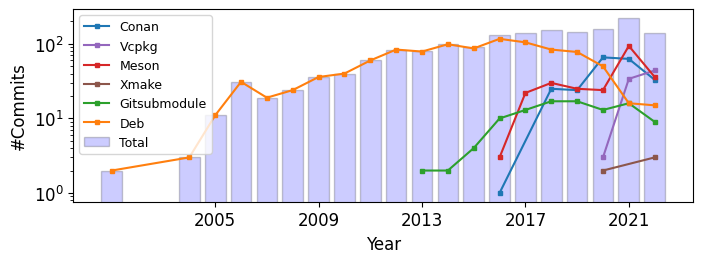

1328


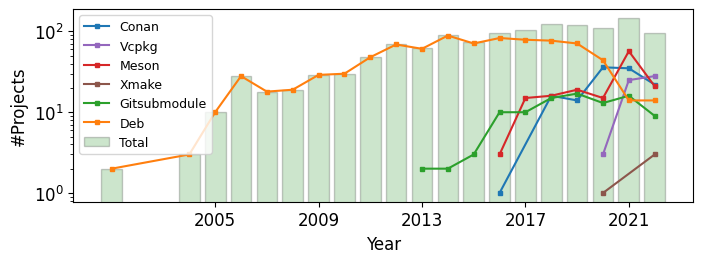

In [6]:
c_mig = get_mig("c")

draw_trend_by_src(c_mig, 'commit_trend', '#Commits')
draw_trend_by_src(c_mig, 'project_trend', '#Projects', project=True)

In [8]:
import pandas as pd
pmt_mig = pd.read_csv('dataset/c_pmt_migration.csv')
get_sankey(pmt_mig)

----------

gitsubmodule [109] conan
deb [46] gitsubmodule
conan [37] gitsubmodule
gitsubmodule [28] meson
gitsubmodule [20] vcpkg
pc-config [11] gitsubmodule
gitsubmodule [10] deb
conan [8] xmake
vcpkg [6] conan
meson [4] gitsubmodule
meson [3] conan
pc-config [3] meson
pc-config [3] conan
vcpkg [2] gitsubmodule
conan [1] meson
